<a href="https://colab.research.google.com/github/Srinidi-V/Machine-Learning-algorithms/blob/main/Spam_ham_mail_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Acquiring**

In [ ]:
# Dataset loading
dataset = '/content/drive/My Drive/spam_ham_dataset.csv'

In [ ]:
import pandas as pd

data = pd.read_csv(dataset)
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


# **Data Preprocessing**

In [ ]:
import nltk 
import re  

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
processed_text = []
for i in data.index:
  new_data = nltk.sent_tokenize(data['text'][i]) 
  for i in range(len(new_data)): 
      new_data[i] = new_data[i].lower() 
      new_data[i] = re.sub(r'\W', ' ', new_data[i]) 
      new_data[i] = re.sub(r'\s+', ' ', new_data[i])
      new_data[i] = re.sub(r'\d+', ' ', new_data[i])
  #x_train['text'][i] = new_data
  temp = " ".join(i for i in new_data)
  temp = str(temp)
  temp = temp.replace('subject','')
  processed_text.append(temp)

#x_train['processed text'] = processed_text
#x_train

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

remove_stop_words = []
stop_words = set(stopwords.words('english'))  

for i in processed_text:
  word_tokens = word_tokenize(i)  
  filtered_sentence = [w for w in word_tokens if not w in stop_words]  
  temp = " ".join(j for j in filtered_sentence)
  temp = str(temp)
  remove_stop_words.append(temp)

data['processed text'] = remove_stop_words
data

,Unnamed: 0,label,text,label_num,processed text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january see attached file hplnol xls h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time ye...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,indian springs deal book teco pvr revenue unde...
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,put ft transport volumes decreased contract th...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,following noms hpl take extra mmcf weekend try...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpine daily gas nomination julie mention ear...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,industrial worksheets august activity attached...


# **Splitting into test and train sets**

In [ ]:
input_data = data.drop('label_num', axis=1)
output_data = data['label_num']

In [ ]:
input_data.rename(columns={'Unnamed: 0':'mail number'}, inplace=True)
input_data

,mail number,label,text,processed text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,enron methanol meter follow note gave monday p...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",hpl nom january see attached file hplnol xls h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",neon retreat ho ho ho around wonderful time ye...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",photoshop windows office cheap main trending a...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,indian springs deal book teco pvr revenue unde...
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,put ft transport volumes decreased contract th...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,following noms hpl take extra mmcf weekend try...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,calpine daily gas nomination julie mention ear...
5169,1409,ham,Subject: industrial worksheets for august 2000...,industrial worksheets august activity attached...


In [ ]:
output_data

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_text = train_test_split(input_data, output_data, test_size=0.3, random_state=42 )

# **1. Naive Bayes Classifier**

## **Creating the bag of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = x_train['processed text']
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
bow = vectorizer.fit_transform(corpus)
#corpus
feature_names = vectorizer.get_feature_names()
feature_names

['aa',
 'aaa',
 'aabda',
 'aabvmmq',
 'aac',
 'aachecar',
 'aaer',
 'aafco',
 'aaigrcrb',
 'aaihmqv',
 'aaldano',
 'aalland',
 'aamlrg',
 'aare',
 'aarhus',
 'aaron',
 'aashqcsny',
 'aavilable',
 'aaxrzm',
 'ab',
 'aba',
 'ababa',
 'abacha',
 'aback',
 'abacus',
 'abacustech',
 'abandone',
 'abandoned',
 'abasements',
 'abash',
 'abate',
 'abater',
 'abazis',
 'abb',
 'abbas',
 'abbasi',
 'abbe',
 'abbey',
 'abbot',
 'abbott',
 'abbreviation',
 'abby',
 'abc',
 'abcdef',
 'abcdzhongguo',
 'abdomen',
 'abdominal',
 'abdominoplasty',
 'abduct',
 'abductbathe',
 'abduction',
 'abdul',
 'abed',
 'abel',
 'abelian',
 'abelmosk',
 'aber',
 'abercrombie',
 'aberdeen',
 'abernathy',
 'aberrant',
 'aberrate',
 'abet',
 'abetting',
 'abeyant',
 'abhorred',
 'abide',
 'abideth',
 'abidjan',
 'abie',
 'abigail',
 'abiiity',
 'abilene',
 'abilities',
 'ability',
 'abissno',
 'abject',
 'abl',
 'ablate',
 'ablaze',
 'able',
 'ablished',
 'ablution',
 'abn',
 'abner',
 'abnormal',
 'abnormalities',
 

In [ ]:
len(feature_names)

37165

## **Creating the required features**

In [ ]:
for i in feature_names:
  word = i
  temp = []
  for x in x_train['processed text']:
    if word in x:
      temp.append(1)
    else:
      temp.append(0)
  x_train[word] = temp

x_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,mail number,label,text,processed text,aa,aaa,aabda,aabvmmq,aac,aachecar,aaer,aafco,aaigrcrb,aaihmqv,aaldano,aalland,aamlrg,aare,aarhus,aaron,aashqcsny,aavilable,aaxrzm,ab,aba,ababa,abacha,aback,abacus,abacustech,abandone,abandoned,abasements,abash,abate,abater,abazis,abb,abbas,abbasi,...,zukin,zunnw,zupymv,zur,zurich,zusagen,zustellung,zuybzbq,zuyjzb,zv,zve,zvikydqu,zvjc,zvrkxjmex,zvx,zwallet,zwftnqlp,zwiers,zwoegen,zwu,zxaghur,zxgwvpiadobe,zxgwvpihere,zxgwvpiimg,zxgwvpimacromedia,zxgwvpimicrosoft,zxgwvpinorton,zxklh,zxzmcnbf,zyban,zyjvit,zykfe,zynsdirnh,zynve,zyqtaqlt,zyrtec,zzezrjok,zzo,zzocb,zzsyt
1023,2409,0,0,tenaska see demand fee changes williams price ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4586,4003,0,0,strong buy alert monthly newsletter topstocks ...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2955,881,0,0,performance feedback chosen one direct reports...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2495,621,0,0,hr performance objectives binders good morning...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3353,3503,0,0,fw fwd fw drawing school age child pa fwd thou...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,802,0,0,ena sales hpl last legal reviewing contract so...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466,1721,0,0,tenaska iv bob understand sandi handling absen...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3092,4571,0,0,broom bristles flew differentiable onomatopoei...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3772,1376,0,0,calpine daily gas nomination weekend ricky arc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **CPT for features**

In [ ]:
cpt_features = {}

for i in feature_names:
  spam_cnt = 0
  ham_cnt = 0
  for ind in x_train.index:
    if i in x_train['processed text'][ind]:
      if y_train[ind] == 0:
        ham_cnt += 1 
      else:
        spam_cnt += 1
  cpt_features[i] = [ham_cnt, spam_cnt]

cpt_features 

{'aa': [34, 100],
 'aaa': [2, 8],
 'aabda': [1, 0],
 'aabvmmq': [0, 1],
 'aac': [3, 9],
 'aachecar': [1, 0],
 'aaer': [0, 1],
 'aafco': [0, 1],
 'aaigrcrb': [0, 1],
 'aaihmqv': [0, 1],
 'aaldano': [1, 0],
 'aalland': [1, 0],
 'aamlrg': [0, 1],
 'aare': [0, 5],
 'aarhus': [0, 2],
 'aaron': [3, 1],
 'aashqcsny': [0, 1],
 'aavilable': [0, 2],
 'aaxrzm': [0, 1],
 'ab': [549, 495],
 'aba': [51, 59],
 'ababa': [0, 2],
 'abacha': [0, 1],
 'aback': [0, 3],
 'abacus': [5, 0],
 'abacustech': [5, 0],
 'abandone': [0, 2],
 'abandoned': [0, 1],
 'abasements': [0, 1],
 'abash': [0, 2],
 'abate': [0, 4],
 'abater': [0, 2],
 'abazis': [0, 4],
 'abb': [6, 28],
 'abbas': [1, 3],
 'abbasi': [1, 0],
 'abbe': [0, 6],
 'abbey': [0, 1],
 'abbot': [2, 6],
 'abbott': [2, 1],
 'abbreviation': [2, 0],
 'abby': [0, 1],
 'abc': [4, 7],
 'abcdef': [0, 1],
 'abcdzhongguo': [0, 1],
 'abdomen': [0, 1],
 'abdominal': [0, 9],
 'abdominoplasty': [0, 1],
 'abduct': [0, 3],
 'abductbathe': [0, 1],
 'abduction': [0, 1],
 'a

In [ ]:
total_ham = 0
total_spam = 0

for i in y_train:
  if i == 0:
    total_ham += 1
  else:
    total_spam += 1

## **Prediction**

In [ ]:
x_predicted_labels = []

for i in x_test['processed text']:
  flag = 0
  text = i
  numerator = 1
  denominator = 1
  for j in text.split(" "):
    if j in cpt_features.keys():
      numerator *= (cpt_features[j][1]/total_spam)
    else:
      numerator = 0
  for j in text.split(" "):
    if j in cpt_features.keys():
      denominator *= (cpt_features[j][0]/total_ham)
    else:
      denominator = 0
  denominator += numerator
  if denominator == 0:   #Handling divide by zero error
    label_pred = 0
    x_predicted_labels.append(label_pred)
    flag = 1
  if flag == 0:
    final_prob_spam = numerator / denominator
    final_prob_ham = 1 - final_prob_spam
    if final_prob_ham > final_prob_spam:
      label_pred = 0
    else:
      label_pred  =1
    x_predicted_labels.append(label_pred)
  

In [ ]:
index_pred = 0
misclassifications = 0

y_test = y_text

for ind in y_test.index:
  if y_test[ind] != x_predicted_labels[index_pred]:
    misclassifications += 1
  index_pred += 1

print("Number of misclassifications = ", misclassifications)

Number of misclassifications =  412


# **Evaluation Metrics for both models**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def eval_metrics(y_pred, y, n):

  x_test_1 = x_test.copy()

  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  for i in range(n):
    if y_pred[i] == 1 and y[i] == 1:
      true_positive = true_positive + 1
    elif y_pred[i] == 0 and y[i] == 0:
      true_negative = true_negative + 1
    elif y_pred[i] == 0 and y[i] == 1:
      false_negative = false_negative + 1
    else:
      false_positive = false_positive + 1

  confusion_matrix = np.array(
            [[true_positive, false_negative], [false_positive, true_negative]])
  print("Confusion Matrix\n", confusion_matrix)

  accuracy = ( true_positive + true_negative ) / ( true_negative + true_positive + false_negative + false_positive )
  print("Accuracy : ", accuracy)

  if (true_positive + false_positive) == 0:
    print("Precision - positive : undefined")
  else:
    precision_positive = true_positive / ( true_positive + false_positive )
    print("Precision - positive : ", precision_positive)

  if (true_negative + false_negative) == 0:
    print("Precision - negative : undefined")
  else:
    precision_negative = true_negative / ( true_negative + false_negative )
    print("Precision - negative : ", precision_negative)

  if (true_positive + false_negative) == 0:
    print("Recall - positive : undefined")
  else:
    recall_positive = true_positive / ( true_positive + false_negative )
    print("Recall - positive : ", recall_positive)

  if (false_positive + true_negative) == 0:
    print("Recall - negative : undefined")
  else:
    recall_negative = true_negative / ( false_positive + true_negative )
    print("Recall - negative : ", recall_negative)

  f_score_positive = 2 * precision_positive * recall_positive / ( precision_positive + recall_positive )
  print("F score positive : ", f_score_positive)

  class_1 = 0
  class_2 = 0

  for i in range(n):
    if y[i] == 0:
      class_1 += 1
    else:
      class_2 += 1
  
  n1 = 1/class_1
  p1 = 1/class_2

  plot_points = {}

  tpr = []
  fpr = []
  wt = []

  tpr_value = 0.0
  fpr_value = 0.0

  prob_values = []

  for i in x_test_1['processed text']:
    temp = [0]*len(feature_names)
    word_list = i.split(" ")
    for wd in range(len(feature_names)):
      if feature_names[wd] in word_list:
        temp[wd] = 1
    x_i = np.array([temp])
    x_i = x_i.reshape(len(feature_names),1)
    wtx = np.dot(W,x_i)
    wt.append(wtx)
    sig = sigmoid(wtx)
    #y_pred = (sig >= 0.5)
    prob_values.append(sig[0][0])

  x_test_1['probability'] = prob_values

  x_test_1 = x_test_1.sort_values('probability', ascending=False, axis=0)

  all_prob_values = list(x_test_1['probability'])

  for k in range(n):
    y_pred_val = 1
    if y_pred[k] == y_pred_val:
      tpr_value += p1
    else:
      fpr_value += n1
    tpr.append(tpr_value)
    fpr.append(fpr_value)

  plot_points['x'] = fpr
  plot_points['y'] = tpr

  plt.plot(plot_points['x'], plot_points['y'])
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC Curve")
  plt.show()

## **Evaluation of Naive Bayes Classifier**

Confusion Matrix
 [[  22  409]
 [   3 1118]]
Accuracy :  0.7345360824742269
Precision - positive :  0.88
Precision - negative :  0.7321545514079896
Recall - positive :  0.05104408352668213
Recall - negative :  0.9973238180196253
F score positive :  0.09649122807017543


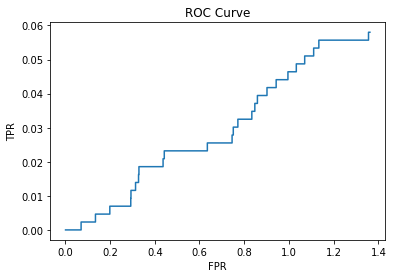

In [ ]:
eval_metrics(x_predicted_labels, list(y_test), len(y_test))

# **2. Logistic Regression**

In [ ]:
# Initialising W values:
W = np.array([0.1]*len(feature_names))
W = W.reshape(1,len(feature_names))

In [ ]:
def SGD(eta,y,sig,W,x):
    W = W - eta*(y - sig)*x.transpose()
    return W

In [ ]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [ ]:
wt = []
sigmoid = np.vectorize(sigmoid)

## **Updation of weights**

In [ ]:
import math

y_train_1 = list(y_train)

for k in range(20):
  wrong_classifications = 0
  y_index = 0
  for i in x_train['processed text']:
      temp = [0]*len(feature_names)
      word_list = i.split(" ")
      for wd in range(len(feature_names)):
        if feature_names[wd] in word_list:
          temp[wd] = 1
      x_i = np.array([temp])
      x_i = x_i.reshape(len(feature_names),1)
      wtx = np.dot(W,x_i)
      wt.append(wtx)
      sig = sigmoid(wtx)
      y_pred = (sig >= 0.5)
      if y_pred != y_train_1[y_index]:
        W = SGD(0.1,y_pred,sig,W,x_i)
        wrong_classifications += 1
      y_index +=1
  print(wrong_classifications)
  if wrong_classifications <= 200:
    print("Continuos right prediction! Model Converged!")
    break
    
print("Weights:",W)    

134
Continuos right prediction! Model Converged!
Weights: [[0.1        0.1        0.08078387 ... 0.1        0.1        0.1       ]]


## **Prediction**

In [ ]:
y_pred_list = []
y_index = 0
wrong_classifications = 0

y_test = list(y_test)

for i in x_test['processed text']:
      temp = [0]*len(feature_names)
      word_list = i.split(" ")
      for wd in range(len(feature_names)):
        if feature_names[wd] in word_list:
          temp[wd] = 1
      x_i = np.array([temp])
      x_i = x_i.reshape(len(feature_names),1)
      wtx = np.dot(W,x_i)
      sig = sigmoid(wtx)
      y_pred = (sig >= 0.5)
      y_pred_list.append(y_pred)
      if y_pred != y_test[y_index]:
        wrong_classifications += 1
      y_index +=1

print(wrong_classifications)

64


## **Evaluation of Logistic Regression Model**

Confusion Matrix
 [[ 394   37]
 [  27 1094]]
Accuracy :  0.9587628865979382
Precision - positive :  0.9358669833729216
Precision - negative :  0.9672855879752431
Recall - positive :  0.91415313225058
Recall - negative :  0.975914362176628
F score positive :  0.9248826291079812


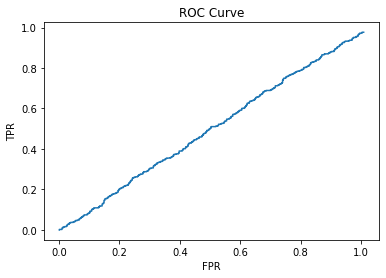

In [ ]:
eval_metrics(y_pred_list, y_test, len(y_test))

# By comparing the two models, the accuracy and other metrics seems to be better for logistic regression as compared to naive bayes classifier